In [19]:
import math
import random
import numpy as np
from numpy import linalg as LNG 
import matplotlib.pyplot as plt


def GeneratePoints(numPoints, numCharges, qPoints, Cr, Cx, Cy, Q, pPoints):
    """
    INPUTS:
        numPoints:      This is the number of points to creat in the simulation
        qPoints:        Array of all the points
        Cr:             Radious of the circle
        Cx:             X position of the circle's origin
        Cy:             Y position of the circle's origin

    RETURNS:
        qPoints:        Array of point locations

    COMMENTS:
        This function generates numPoints of charges around the area of a circle and adds
        them to a numpy array and returns that array

    """
    #Break up the total charge between charge points
    q = Q/numPoints                                 #Divided up the total charge between points
    Px = 0                                          #X coordinate used for calculateions
    Py = 0                                          #y coordinate used for calculateions
    for i in range(numCharges):
        theta = 2 * math.pi * random.random()       #generate a random angle 
        chargeX = Cr * math.cos(theta) + Cx         #set points x coordinate
        chargeY = Cr * math.sin(theta) + Cy         #set points y coordinate
        #set values for the point x and y position and the charge q
        qPoints[i,0] = chargeX                       
        qPoints[i,1] = chargeY
        qPoints[i,2] = q                        #this is a place holder for charge
    #This was used to generate random points for calculate the magnetic field.  it is commented out and set poins will be generated
    #for j in range(numPoints):
        #theta = 2 * math.pi * random.random()               #generate a random angle
        #rad = Cr * math.sqrt(random.random() * 10)          #generate a random radious length
        #Px = rad * math.cos(theta) + Cx                     #generate point's x coordinate
        #Py = rad * math.sin(theta) + Cy                     #generate point's y coordinate
        #set the values for x and y position of the test points
        #pPoints[j,0] = Px                       
        #pPoints[j,1] = Py
    pPoints[0,0], pPoints[0,1] = 3,3
    pPoints[1,0], pPoints[1,1] = 2,4
    pPoints[2,0], pPoints[2,1] = 5,5
    pPoints[3,0], pPoints[3,1] = 3,5
    
    
    return qPoints, pPoints 

 
def FieldCalc(numCharges, numPoints, qPoints, pPoints):
    """
    INPUTS:
        qPoints:        Array of all the points
        Px, Py:         x and y coordinates for the position where the field will be calculated

    RETURNS:
        eField          Array of field strength values

    COMMENTS:
        This function generates numPoints of charges around the area of a circle and adds
        them to a numpy array and returns that array
for j in range(numPoints):
        
    """
    
    #Constants  
    K = 9e9                          #Coulomb constant 
    eFieldX = 0                      #Total electric field x  
    eFieldY = 0                      #Total electric field y
    E = np.zeros((numPoints,3))  #NumPy array for storing the electric field from each charge
   
    for i in range(numPoints):
        for j in range(numCharges):
            #Solve r vector for each point in the array
            rVec = np.array([[pPoints[i,0] - qPoints[j,0]], [pPoints[i,1] - qPoints[j,1]]])  
            #print(rVec)
            #solve for the magnitued of rVec
            rNorm = LNG.norm(rVec)
            rMag = rNorm ** 2
            #print(rNorm, " norm")
            #solve for rHat
            rHat = np.divide(rVec, rNorm)
            #print(rHat,)
            #Calculate the field from the current charge at current point p
            eField = (K*qPoints[j,2]*rHat)/rMag
            #store eField values in an array to be returned
            E[i,0] += eField[0]
            E[i,1] += eField[1]
        E[i,2] = math.sqrt(E[i,0] ** 2 + E[i,1] ** 2)
    
    return E
# End of FieldCalc function


In [20]:
"""
    This cell sets up the inputs and calls the function FieldCalc to compare the the values to the 
    calculated values in the following cell for proof of solution
"""

#User input varables
numCharges = 100         #Number of charge point to generate
numPoints = 1           #Number of points to generate to calculate the field at
Q = 12e-6                #Total Charge
Cx = 0                   #Circle center x coordinate
Cy = 0                   #Circle center y coordinate
Cr = 1                   #Circle radius
qPoints = np.zeros((numCharges,3))  #Create a numpy array to hold the charge points 
pPoints = np.zeros((numPoints,2))   #Create a numpy array to hold the test points

#Set up a single charge at [0,0] = x [0,1] = y, [0,2] = the charge
qPoints[0,0], qPoints[0,1],qPoints[0,2] = 0.00,0.00,Q
pPoints[0,0], pPoints[0,1] = 1.00,1.00
#call the FieldCalc function
E = FieldCalc(numCharges, numPoints, qPoints, pPoints)  #Call the function to calculate the E field point P
#print the values
for i in range(numPoints):
    print("< ", E[i,0], "," ,E[i,1], "> N/C with a magnatude of", E[i,2], " N/C")



<  38183.76618407355 , 38183.76618407355 > N/C with a magnatude of 53999.999999999985  N/C


### Verification of the EfieldClac algorithm 
The above set up has a charge of 12$\mu$C at a x and y position of (0,0) in meters.  The point where the 
field will be calculated at has a x and y position of (1,1) in meters.  We calculate the magnitude of the 
electric field as follows $|E|=K\frac{Q_1}{r_1^2}$.  
Q is 12$\mu$C. r is $\sqrt{2}m$.
K is Coulomb's constant which is $9x10^9 \frac{Nm^2}{C}$
r is the $ \sqrt{2} $ Since the points are 1 meter apart in the X direction and 1 meter in the Y direction 
$r=\sqrt{x^2 + y^2}$<br>
Plugging in the values we get $\frac{(9x10^9)(12x10^-6)}{\sqrt{2^2}}  \approx 54000 \frac{N}{C} = E $<br>
We can not get the X and Y components of E as follows<br>
$ E_x = E * cos\theta $ with $\theta$ being the angle between X and the direction of E.  In this example 
$theta$ is 45$^{\circ}$<br>
Solving the equation yields<br>
$E_X = 54000*cos(45^{\circ}) \approx 38000 \frac{N}{C}$ <br>
The Y component is like wise given by:<br>
$E_Y = 54000*sin(45^{\circ}) \approx 38000 \frac{N}{C}$ <br>
As demonstrated here the EfieldCalc algorithm accurately calculate electric fields.



### Next we will show that the electric field vectors add correctly
To do this we will run the same code with 2 charges.  The expected result will be the vector addition of both charges

In [21]:
#User input varables
numCharges = 2          #Number of charge point to generate
numPoints = 4           #Number of points to generate to calculate the field at *****(MUST MATCH # OF POINTS in pPoints function)****
Q1 = 12e-6              #Charge 1
Q2 = 12e-6               #Charge 2
Cx = 0                   #Circle center x coordinate
Cy = 0                   #Circle center y coordinate
Cr = 1                   #Circle radius
qPoints = np.zeros((numCharges,3))  #Create a numpy array to hold the charge points 
pPoints = np.zeros((numPoints,2))   #Create a numpy array to hold the test points

#Set up a single charge at [0,0] = x [0,1] = y, [0,2] = the charge
qPoints[0,0], qPoints[0,1],qPoints[0,2] = 1.00,0.00,Q1
qPoints[1,0], qPoints[1,1],qPoints[1,2] = 0.00,1.00,Q2
pPoints[0,0], pPoints[0,1] = 1.00,1.00
#call the FieldCalc function
E = FieldCalc(numCharges, numPoints, qPoints, pPoints)  #Call the function to calculate the E field point P
#print the values
for i in range(numPoints):
    print("< ", E[i,0], "," ,E[i,1], "> N/C with a magnatude of", E[i,2], " N/C")
    

<  108000.0 , 108000.0 > N/C with a magnatude of 152735.06473629427  N/C
<  -108000.0 , -108000.0 > N/C with a magnatude of 152735.06473629427  N/C
<  -108000.0 , -108000.0 > N/C with a magnatude of 152735.06473629427  N/C
<  -108000.0 , -108000.0 > N/C with a magnatude of 152735.06473629427  N/C


### Testing the charge placement 
In the following cell we will plot a large number of charges to show that they are on a circle with radius Cr centered at (0,0)

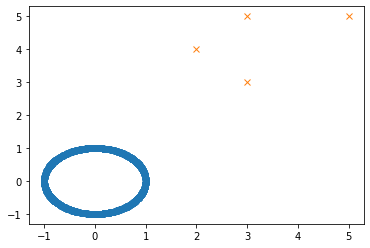

In [22]:
#User input varables

numCharges = 1000        #Number of charge point to generate
numPoints = 4            #Number of points to generate to calculate the field at *****(MUST MATCH # OF POINTS in pPoints function)****
Q = 12e-6                #Total Charge
Cx = 0                   #Circle center x coordinate
Cy = 0                   #Circle center y coordinate
Cr = 1                   #Circle radius
eFieldX = 0              #Total electric field x  
eFieldY = 0              #Total electric field y
eMag = 0                 #Total magnatue of the electric field
qPoints = np.zeros((numCharges,3))  #Create a numpy array to hold the charge points 
pPoints = np.zeros((numPoints,2))   #Create a numpy array to hold the test points
xChargePoints = np.zeros(([numCharges,1]))
yChargePoints = np.zeros(([numCharges,1]))
Ex = np.zeros(([numPoints,1]))
Ey = np.zeros(([numPoints,1]))
Px = np.zeros(([numPoints,1]))
Py = np.zeros(([numPoints,1]))

#generate points and calculate the field  
qPoints, pPoints = GeneratePoints(numPoints,numCharges,qPoints,1,Cx,Cy,Q, pPoints)     #Call the function to generate point charges

E = FieldCalc(numCharges, numPoints, qPoints, pPoints)  #Call the function to calculate the E field point P
for g in range(numCharges):
    #break up x and y point into seperate arrays
    xChargePoints[g] = qPoints[g,0]
    yChargePoints[g] = qPoints[g,1]
for k in range(numPoints):
    #Seperate the electric field into x and y componants
    Ex[k] = E[k,0]
    Ey[k] = E[k,1]
    Px[k] = pPoints[k,0]
    Py[k] = pPoints[k,1]
fig = plt.figure()

plt.plot(xChargePoints, yChargePoints, 'o')
plt.plot(Px, Py,'x')
plt.show()
    
    